In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
f = np.load('../data.npz')
x = f['feature']
y = f['jump']

In [14]:
print(x.shape, y.shape)

(1, 1000, 12) (1000,)


In [15]:
x = x.reshape(-1, 12)
y = y.flatten()

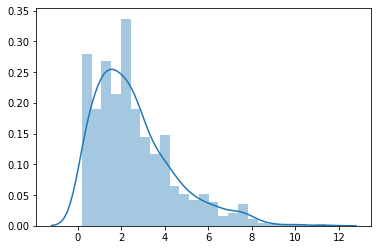

In [16]:
sns.distplot(y)

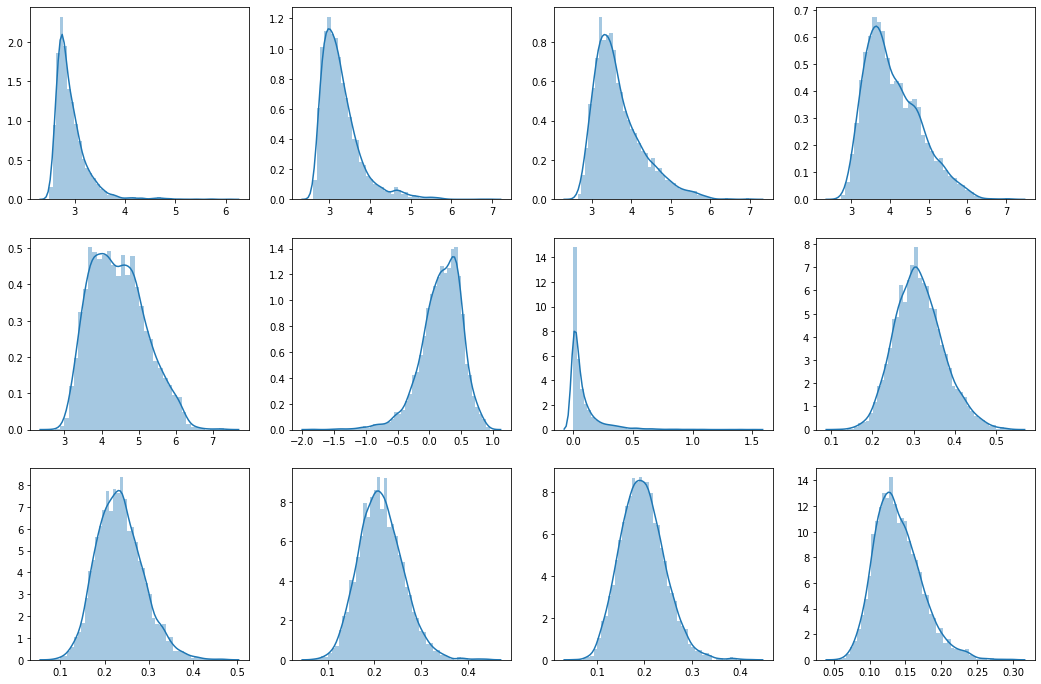

In [232]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
idx = 0
for i in range(3):
    for j in range(4):
        sns.distplot(x[:,idx], ax=ax[i,j])
        idx += 1

In [17]:
scaler = StandardScaler()
data = np.concatenate((x, y.reshape(-1,1)), axis=1)
scaler.fit(data)
data_norm = scaler.transform(data)
x_norm = data_norm[:,:-1]
y_norm = data_norm[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=.2)

In [18]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

regr = SVR()
regr.fit(x_train, y_train)
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

(0.494946336698431, 1.1531224845305144e-50)
(0.07540291817345149, 0.288605466318834)


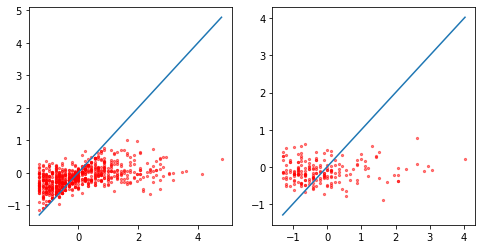

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

xx = np.linspace(np.min(y_train), np.max(y_train), 1000)
ax[0].plot(xx, xx)
ax[0].scatter(y_train, y_train_pred, s=5, alpha=.5, c='red')

xx = np.linspace(np.min(y_test), np.max(y_test), 1000)
ax[1].plot(xx, xx)
ax[1].scatter(y_test, y_test_pred, s=5, alpha=.5, c='red')

print(scipy.stats.pearsonr(y_train, y_train_pred))
print(scipy.stats.pearsonr(y_test, y_test_pred))

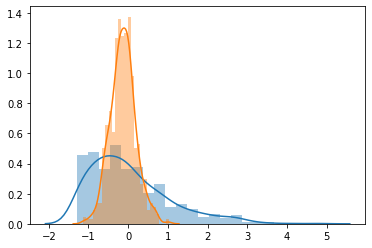

In [20]:
sns.distplot(y_train)
sns.distplot(y_train_pred)

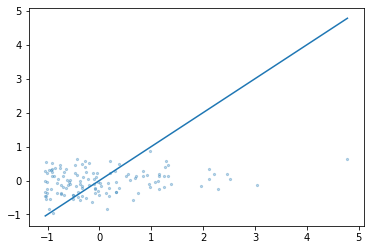

In [21]:
x = np.loadtxt('../test2.xvg')
xx = np.linspace(x[:,0].min(), x[:,0].max(), 100)
plt.plot(xx, xx)
plt.scatter(x[:,0], x[:,1], s=5, alpha=.3)

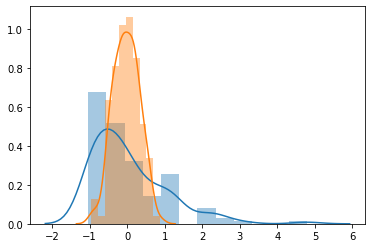

In [22]:
sns.distplot(x[:,0])
sns.distplot(x[:,1])